# Tugas Besar Viskom

In [1]:
#import
import os
import json
import string
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras import Model
from keras.layers import Dense
from keras.preprocessing import image
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from keras.applications.mobilenet_v2 import preprocess_input, MobileNetV2
from sklearn.metrics import confusion_matrix, classification_report


In [2]:
import torch

print("Number of GPU: ", torch.cuda.device_count())
print("GPU Name: ", torch.cuda.get_device_name())

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Number of GPU:  1
GPU Name:  NVIDIA GeForce GTX 1050
Using device: cuda


In [3]:
trainDir = 'train'
valDir = 'val'

In [4]:
def preprocessImages(dirPath):
    images = []
    labels = [] 
    label_map = {label: idx for idx, label in enumerate(sorted(os.listdir(dirPath)))}

    for label in os.listdir(dirPath):
        labelDir = os.path.join(dirPath, label)
        if os.path.isdir(labelDir):
            for name in os.listdir(labelDir):
                img_path = os.path.join(labelDir, name)
                if name.endswith('.jpg'):
                    img = image.load_img(img_path, target_size=(224, 224))
                    arrImg = image.img_to_array(img)
                    arrImg = preprocess_input(arrImg)
                    images.append(arrImg)
                    labels.append(label_map[label])
    
    return np.array(images), np.array(labels)

In [5]:
trainImg, trainLabel = preprocessImages(trainDir)
valImg, valLabel = preprocessImages(valDir)

print("trainImg:", trainImg.shape)
print("trainLabel:", trainLabel.shape)
print("Validation images shape:", valImg.shape)
print("Validation labels shape:", valLabel.shape)

trainImg: (9169, 224, 224, 3)
trainLabel: (9169,)
Validation images shape: (2301, 224, 224, 3)
Validation labels shape: (2301,)


In [6]:
label_to_char = {idx: char for idx, char in enumerate(string.ascii_lowercase)}

In [16]:
baseModel = MobileNetV2(weights='imagenet')

In [17]:
outputLayer  = Dense(26, activation='softmax')
outputLayer = outputLayer(baseModel.layers[-2].output)
inputLayer = baseModel.input

model = Model(inputs=inputLayer, outputs=outputLayer)

for layer in model.layers[:-1]:
    layer.trainable = False

In [18]:
model.compile(
    optimizer= SGD(learning_rate=0.002, momentum=0.9),
    loss=SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [19]:
history = model.fit(
    x=trainImg,
    y=trainLabel,
    validation_data=(valImg, valLabel),
    batch_size=64,
    epochs=32,
    verbose=2
)

Epoch 1/32
144/144 - 194s - 1s/step - accuracy: 0.5164 - loss: 2.1214 - val_accuracy: 0.7688 - val_loss: 1.1863
Epoch 2/32
144/144 - 180s - 1s/step - accuracy: 0.7928 - loss: 0.9772 - val_accuracy: 0.8110 - val_loss: 0.8370
Epoch 3/32
144/144 - 181s - 1s/step - accuracy: 0.8302 - loss: 0.7518 - val_accuracy: 0.8392 - val_loss: 0.7010
Epoch 4/32
144/144 - 171s - 1s/step - accuracy: 0.8545 - loss: 0.6356 - val_accuracy: 0.8561 - val_loss: 0.6203
Epoch 5/32
144/144 - 167s - 1s/step - accuracy: 0.8713 - loss: 0.5611 - val_accuracy: 0.8618 - val_loss: 0.5692
Epoch 6/32
144/144 - 167s - 1s/step - accuracy: 0.8878 - loss: 0.5029 - val_accuracy: 0.8722 - val_loss: 0.5209
Epoch 7/32
144/144 - 167s - 1s/step - accuracy: 0.8991 - loss: 0.4571 - val_accuracy: 0.8848 - val_loss: 0.4885
Epoch 8/32
144/144 - 167s - 1s/step - accuracy: 0.9105 - loss: 0.4201 - val_accuracy: 0.8940 - val_loss: 0.4621
Epoch 9/32
144/144 - 167s - 1s/step - accuracy: 0.9196 - loss: 0.3884 - val_accuracy: 0.8961 - val_loss:

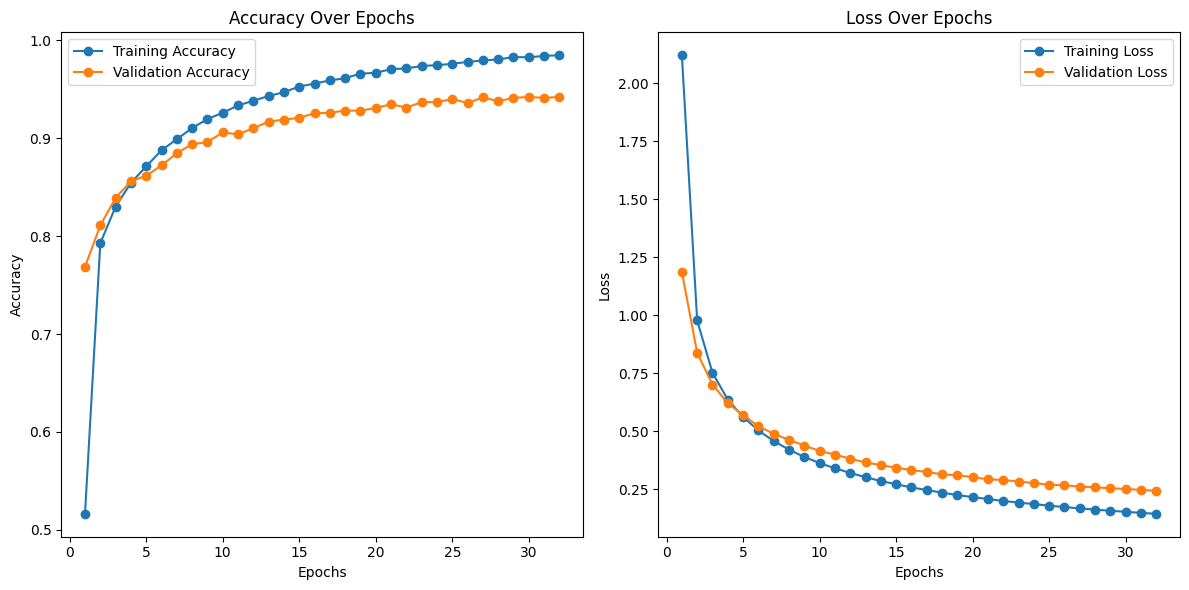

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy', marker='o')
plt.plot(epochs, val_acc, label='Validation Accuracy', marker='o')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

72/72 ━━━━━━━━━━━━━━━━━━━━ 47s 636ms/step


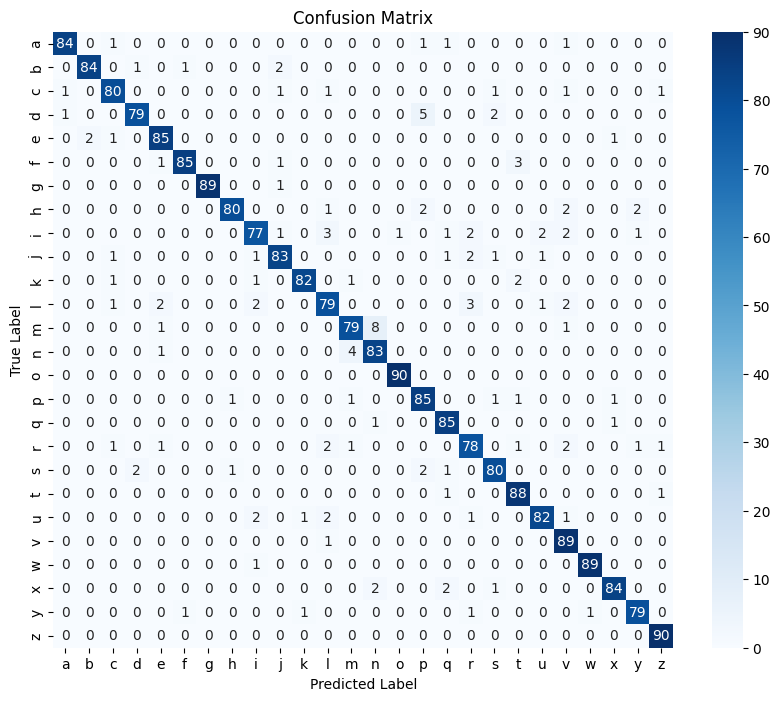

              precision    recall  f1-score   support

           a       0.98      0.95      0.97        88
           b       0.98      0.95      0.97        88
           c       0.93      0.93      0.93        86
           d       0.96      0.91      0.93        87
           e       0.93      0.96      0.94        89
           f       0.98      0.94      0.96        90
           g       1.00      0.99      0.99        90
           h       0.98      0.92      0.95        87
           i       0.92      0.86      0.89        90
           j       0.93      0.92      0.93        90
           k       0.98      0.94      0.96        87
           l       0.89      0.88      0.88        90
           m       0.92      0.89      0.90        89
           n       0.88      0.94      0.91        88
           o       0.99      1.00      0.99        90
           p       0.89      0.94      0.92        90
           q       0.92      0.98      0.95        87
           r       0.90    

In [21]:
predictions = model.predict(valImg, batch_size=32)
predicted_classes = np.argmax(predictions, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(valLabel, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=string.ascii_lowercase, yticklabels=string.ascii_lowercase)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Optional: Print classification report
print(classification_report(valLabel, predicted_classes, target_names=list(string.ascii_lowercase)))

## Save

In [23]:
#save
model.save('model.keras')
with open('history.json', 'w') as f:
    json.dump(history.history, f)

## Load

In [ ]:
model = load_model('mobilenetv2_model.keras')
with open('mobilenetv2_history.json', 'r') as f:
    history = json.load(f)

## Reference
- https://pythontutorials.eu/deep-learning/transfer-learning/
- https://keras.io/api/applications/mobilenet/
- F. Rachardi, “Deteksi gambar gestur kosakata bahasa isyarat indonesia dengan convolutional neural network,” 2020. [Online]. Available: https://repository.uinjkt.ac.id/dspace/bitstream/123456789/56075/1/FERDIAN%20RACHARDI-FST.pdf